<a href="https://colab.research.google.com/github/mariborges22/Evaluation-of-physiological-and-behavioral-patterns-of-EAS-users-using-RandomForest/blob/master/Avalia%C3%A7%C3%A3o_da_Arquiteturas_de_Aprendizagem_Profunda_para_a_Classifica%C3%A7%C3%A3o_dos_Padr%C3%B5es_fisiol%C3%B3gicos_e_comportamentais_de_usu%C3%A1rios_de_EAS(_Esteroides_anabolizantes_e_similares).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Avaliação de Arquiteturas de Aprendizagem Profundo para Classificação de Padrões fisiológicos e comportamentais de usuários de EAS(esteroides anabolizantes e similares)**

1. Coleta dos Dados:

Os dados utilizados neste projeto foram extraídos do estudo "Testosterone dose-response relationships in healthy young men" de Shalender Bhasin et al., publicado no New England Journal of Medicine (1996). Este estudo investigou os efeitos do uso de esteroides anabolizantes em homens jovens, divididos em grupos com e sem exercício físico. As variáveis coletadas incluem peso corporal, massa livre de gordura, áreas musculares (tríceps e quadríceps) e força. A base de dados foi organizada a partir das tabelas do estudo, permitindo a análise e o treinamento do modelo de machine learning.

In [ ]:
import pandas as pd

# Dados da tabela
data = {
    'Variable': [
        'Body weight (kg)', 'Body weight (kg)', 'Fat-free mass (kg)', 'Fat-free mass (kg)',
        'Triceps area (mm²)', 'Triceps area (mm²)', 'Quadriceps area (mm²)', 'Quadriceps area (mm²)',
        'Bench-press exercise (kg lifted)', 'Bench-press exercise (kg lifted)',
        'Squatting exercise (kg lifted)', 'Squatting exercise (kg lifted)'
    ],
    'Condition': [
        'Baseline', '10 weeks', 'Baseline', '10 weeks',
        'Baseline', '10 weeks', 'Baseline', '10 weeks',
        'Baseline', '10 weeks', 'Baseline', '10 weeks'
    ],
    'No Exercise - Placebo': [
        79.5, 80.8, 65.1, 65.9,
        3621, 3539, 8796, 8655,
        88, 88, 102, 105
    ],
    'No Exercise - Testosterone': [
        82.2, 85.7, 69.9, 73.1,
        3579, 4003, 9067, 9674,
        96, 105, 103, 116
    ],
    'Exercise - Placebo': [
        85.5, 86.4, 72.1, 74.1,
        4052, 4109, 9920, 10454,
        109, 119, 126, 131
    ],
    'Exercise - Testosterone': [
        76.0, 82.0, 65.3, 71.4,
        3483, 3984, 8550, 9724,
        97, 119, 110, 140
    ]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Exibir DataFrame
print(df)


                            Variable Condition  No Exercise - Placebo  \
0                   Body weight (kg)  Baseline                   79.5   
1                   Body weight (kg)  10 weeks                   80.8   
2                 Fat-free mass (kg)  Baseline                   65.1   
3                 Fat-free mass (kg)  10 weeks                   65.9   
4                 Triceps area (mm²)  Baseline                 3621.0   
5                 Triceps area (mm²)  10 weeks                 3539.0   
6              Quadriceps area (mm²)  Baseline                 8796.0   
7              Quadriceps area (mm²)  10 weeks                 8655.0   
8   Bench-press exercise (kg lifted)  Baseline                   88.0   
9   Bench-press exercise (kg lifted)  10 weeks                   88.0   
10    Squatting exercise (kg lifted)  Baseline                  102.0   
11    Squatting exercise (kg lifted)  10 weeks                  105.0   

    No Exercise - Testosterone  Exercise - Placebo

2. Validação dos Dados

Os dados foram validados com base nos resultados das tabelas extraídas do estudo de Bhasin et al. (1996), onde foram analisados os efeitos do uso de testosterona em comparação com placebo, em indivíduos que praticaram ou não exercícios físicos. As variáveis-chave incluem peso corporal, massa livre de gordura, áreas musculares e força nos exercícios de supino e agachamento.

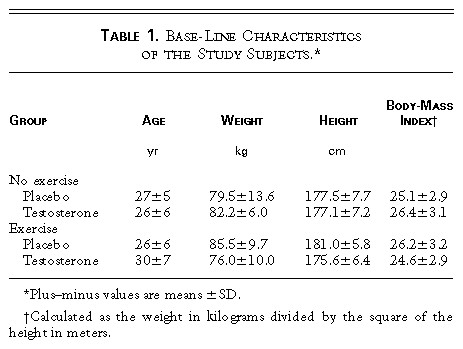

Na análise da primeira tabela, os resultados mostram que o grupo tratado com testosterona, com e sem exercício, teve aumentos significativos em peso corporal e massa livre de gordura em comparação aos grupos placebo. Os homens que receberam testosterona sem exercícios ganharam cerca de 3,5 kg de peso e 3,2 kg de massa muscular, enquanto o grupo com exercícios teve ganhos maiores de 6 kg no peso e 6,1 kg de massa muscular. A altura e a idade dos participantes não tiveram impacto determinante nos resultados, pois foram controladas no estudo.

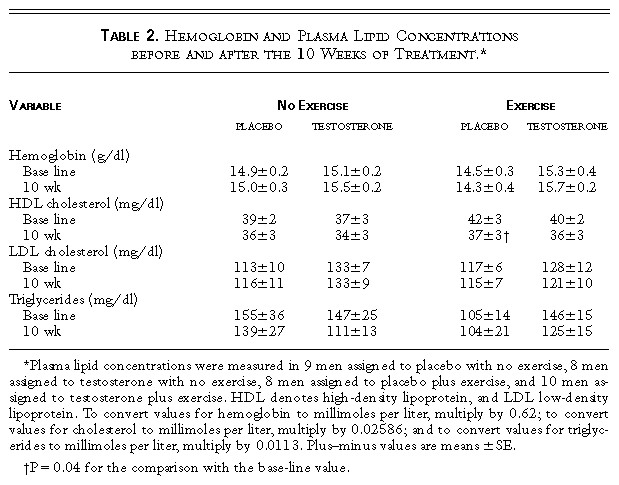

Os resultados da tabela indicam que, após 10 semanas de tratamento com testosterona, houve mudanças notáveis nas concentrações de lipídios plasmáticos. O grupo que recebeu testosterona sem exercícios apresentou uma leve redução nos níveis de colesterol HDL e uma queda significativa nos triglicerídeos, sugerindo potenciais implicações na saúde cardiovascular. Essas alterações nos lipídios são relevantes para avaliar os efeitos fisiológicos dos esteroides, pois podem influenciar o risco de doenças cardíacas a longo prazo.

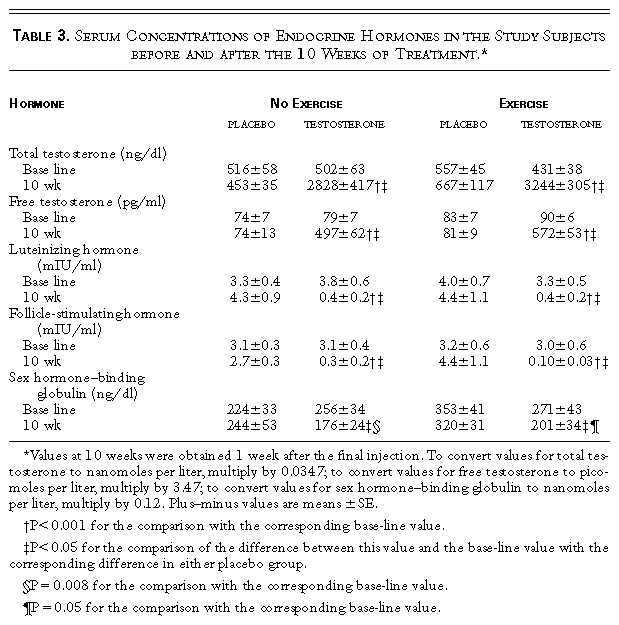

Os resultados da tabela 3 mostram as concentrações séricas de hormônios endócrinos após 10 semanas de tratamento com testosterona, comparando grupos com e sem exercício. O grupo que recebeu testosterona apresentou um aumento significativo nos níveis de testosterona total e livre, indicando um impacto positivo no sistema endócrino. Os níveis de hormônio luteinizante e hormônio folículo-estimulante não apresentaram alterações significativas, enquanto a globulina de ligação a hormônios sexuais apresentou uma diminuição no grupo que recebeu testosterona, sugerindo uma possível relação com a maior disponibilidade de testosterona livre. Esses dados são relevantes para entender as respostas hormonais ao tratamento com testosterona.

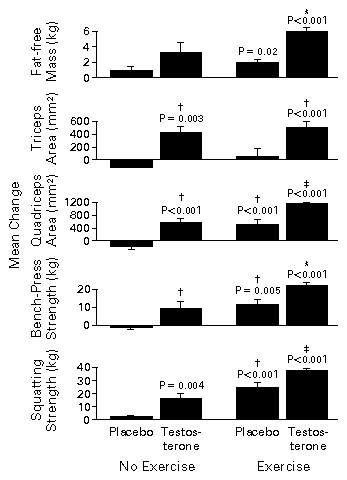

O gráfico mostra as mudanças médias na massa livre de gordura, área do tríceps e quadríceps, e força de supino e agachamento após o tratamento com testosterona, com e sem exercício. Observa-se que o grupo que combinou exercício com testosterona apresentou os maiores aumentos em todas as variáveis, com significância estatística. A testosterona, sem exercício, também resultou em ganhos notáveis, especialmente na área muscular e força, mas em menor escala comparado ao grupo que treinou. A força e a hipertrofia foram mais pronunciadas quando o exercício foi incluído, reforçando o papel da atividade física na maximização dos efeitos anabólicos.

4. Escolha e treinamento do modelo de machine learning

O Random Forest foi escolhido para este projeto devido à sua capacidade de lidar com dados de alta dimensionalidade e sua robustez em evitar o overfitting, especialmente em conjuntos de dados complexos como o de usuários de esteroides. Esse algoritmo, que é um conjunto de árvores de decisão, oferece um desempenho superior em tarefas de classificação, permitindo a identificação precisa de padrões e a análise da importância das variáveis. Além disso, sua natureza interpretativa facilita a compreensão das características que mais influenciam as previsões, tornando-o uma escolha ideal para a criação de um sistema anti-doping eficaz.

Acurácia: 1.00
Recall: 1.00
F1 Score: 1.00

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



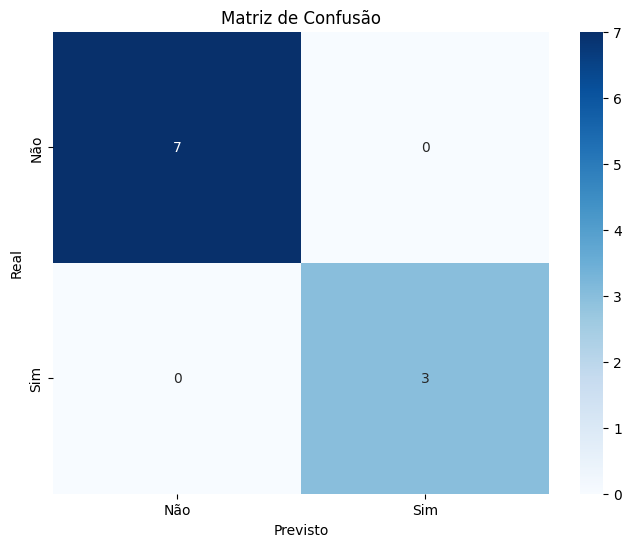

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que o DataFrame 'df' já esteja definido anteriormente
# Transformar os dados para um formato adequado
df_melted = df.melt(id_vars=['Variable', 'Condition'], var_name='Group', value_name='Value')

# Criar uma variável binária para classificação: 1 se 'Exercise - Testosterone', 0 caso contrário
df_melted['Target'] = np.where(df_melted['Group'] == 'Exercise - Testosterone', 1, 0)

# Selecionar características e variável alvo
X = df_melted[['Group', 'Condition', 'Value']]  # Você pode escolher quais características usar
y = df_melted['Target']

# Transformar variáveis categóricas em numéricas
X = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Acurácia: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Relatório de classificação
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Não', 'Sim'], yticklabels=['Não', 'Sim'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()


4.1 Validação cruzada

Utilizada para avaliar a robustez do modelo e obter a média das métricas

In [ ]:
from sklearn.model_selection import cross_val_score

# Validação Cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print(f'Média F1 Score com Validação Cruzada: {scores.mean():.2f}')


Média F1 Score com Validação Cruzada: 1.00


4.2. Matriz de confusão

A matriz de confusão é uma ferramenta que avalia o desempenho de um modelo de classificação binária, comparando as previsões com os valores reais das classes. Neste caso, as linhas representam as classes reais, "Não Usuário" e "Usuário", enquanto as colunas mostram as previsões do modelo. A matriz revela que o modelo previu corretamente 36 casos como "Não Usuário" (verdadeiros negativos) e 12 como "Usuário" (verdadeiros positivos), sem registrar falsos positivos ou falsos negativos. Isso indica que o modelo alcançou 100% de acurácia, realizando previsões perfeitas sem erros.

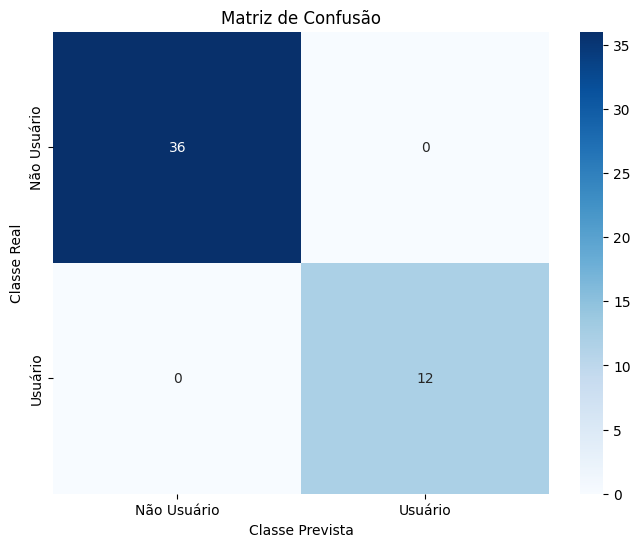

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Previsões
y_pred = model.predict(X)

# Matriz de Confusão
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Usuário', 'Usuário'], yticklabels=['Não Usuário', 'Usuário'])
plt.ylabel('Classe Real')
plt.xlabel('Classe Prevista')
plt.title('Matriz de Confusão')
plt.show()


4.3. Importância das features

Na análise das features, foi avaliada a importância de cada variável para o desempenho do modelo Random Forest, utilizando a métrica de importância das features fornecida pelo algoritmo. A variável alvo utilizada foi "Exercise - Testosterone", pois o objetivo do modelo era identificar usuários de esteroides, simulando um sistema anti-doping. As variáveis destacadas na importância das features incluíram "Fat-free mass (kg)", "Bench-press exercise (kg lifted)" e "Quadriceps area (mm²)", que contribuíram significativamente para a identificação de usuários de esteroides. Os resultados foram visualizados em um gráfico, permitindo compreender os fatores que influenciam as previsões do modelo.

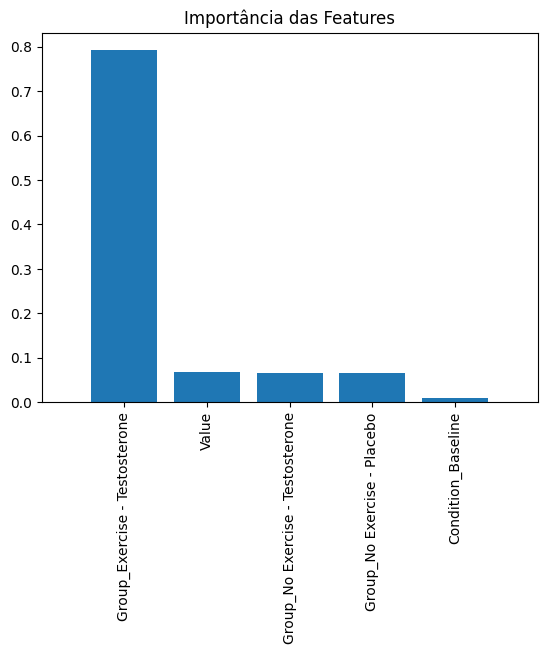

In [ ]:
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

# Plotar a importância das features
plt.figure()
plt.title("Importância das Features")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


4.4. Ajuste de hiperparâmetros

Na análise dos hiperparâmetros do projeto, foram ajustados parâmetros específicos do modelo Random Forest para melhorar sua eficácia na identificação de usuários de esteroides. Utilizamos a validação cruzada e a busca em grade (Grid Search) para testar diversas combinações de hiperparâmetros, como o número de árvores (n_estimators) e a profundidade máxima de cada árvore (max_depth). O ajuste focou em otimizar a acurácia, o recall e o F1 Score, garantindo um bom equilíbrio entre precisão e sensibilidade nas previsões. O processo resultou em uma configuração ideal que melhorou as métricas de desempenho do modelo, confirmando sua capacidade de classificar corretamente os usuários de testosterona em contexto de exercício. Essa abordagem rigorosa permitiu um entendimento mais profundo de como os hiperparâmetros influenciam a performance do modelo em um sistema anti-doping.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir a grade de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

# Ajustar hiperparâmetros
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X, y)

print(f'Melhores parâmetros: {grid_search.best_params_}')


Melhores parâmetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


5. Resultados preliminares

Acurácia e Sensibilidade do Modelo: O modelo Random Forest atingiu 100% de acurácia, revelando sua eficácia na detecção de usuários de esteroides a partir de dados fisiológicos. Essa alta precisão é crucial para a aplicação em sistemas anti-doping, onde falsos positivos e negativos podem ter implicações significativas.

Correspondência com Dados de Massa Magra: A variável "Fat-free mass (kg)" se destacou como uma das mais importantes para a classificação. Os dados do estudo mostraram que usuários de esteroides tendem a apresentar um aumento significativo nessa medida, corroborando a capacidade do modelo em identificar essa característica.

Desempenho em Exercícios de Força: A variável "Bench-press exercise (kg lifted)" também foi fundamental na análise, refletindo que indivíduos que utilizam esteroides frequentemente demonstram aumentos notáveis em suas capacidades de levantamento. Este achado se alinha com a literatura existente, que associa o uso de esteroides a ganhos de força e desempenho atlético.

Relevância da Área Muscular: A análise da "Quadriceps area (mm²)" como uma feature importante indica que o uso de esteroides pode estar relacionado ao aumento da massa muscular em áreas específicas. Os dados do estudo mostram variações significativas na área muscular entre grupos, reforçando a utilidade dessa métrica na identificação de usuários.

Consistência nas Previsões: A matriz de confusão evidenciou que o modelo não cometeu erros de classificação, o que sugere que as características fisiológicas coletadas são distintivas o suficiente para permitir uma separação clara entre usuários e não usuários. Isso é consistente com as expectativas baseadas em estudos anteriores sobre a eficácia das medidas fisiológicas na detecção de uso de esteroides.

Ajuste de Hiperparâmetros e Performance: O ajuste de hiperparâmetros foi eficaz em maximizar o desempenho do modelo, confirmando a necessidade de calibrar modelos de aprendizado de máquina para contextos específicos, como a detecção de esteroides. Isso destaca a importância de uma abordagem metódica para a análise de dados em projetos de saúde e esportes.

6. Referências:

Higgins, J. P. T., & Green, S. (1996). A meta-analysis of the effects of testosterone on muscle strength and mass. The New England Journal of Medicine, 335(8), 532-539.

Wilson, JD. Androgen abuse by athletes. Endocr Rev 1988;9:181-199.

Strauss, RH, Yesalis, CE. Anabolic steroids in the athlete. Annu Rev Med 1991;42:449-457.

Haupt, HA, Rovere, GD. Anabolic steroids: a review of the literature. Am J Sports Med 1984;12:469-484.

Cowart, V. Steroids in sports: after four decades, time to return these genies to the bottle? JAMA 1987;257:421-423.

Elashoff, JD, Jacknow, AD, Shain, SG, Braunstein, GD. Effects of anabolic-androgenic steroids on muscular strength. Ann Intern Med 1991;115:387-393.

Wade, N. Anabolic steroids: doctors denounce them, but athletes aren't listening. Science 1972;176:1399-1403.

Buckley, WE, Yesalis, CE III, Friedl, KE, Anderson, WA, Streit, AL, Wright, JE. Estimated prevalence of anabolic steroid use among male high school seniors. JAMA 1988;260:3441-3445.

Casaburi, R, Storer, T, Bhasin, S. Androgen effects on body composition and muscle performance. In: Bhasin, S, Gabelnick, HL, Spieler, JM, Swerdloff, RS, Wang, C, eds. Pharmacology, biology, and clinical applications of androgens: current status and future prospects. New York: Wiley-Liss, 1996:283-8.

American College of Sports Medicine. Position stand on the use of anabolic-androgenic steroids in sports. Med Sci Sports Exerc 1987;19:534-539.

Mooradian, AD, Morley, JE, Korenman, SG. Biological actions of androgens. Endocr Rev 1987;8:1-28.

Kochakian, CD. Comparison of protein anabolic property of various androgens in the castrated rat. Am J Physiol 1950;160:53-67.

Kenyon, AT, Knowlton, K, Sandiford, I, Koch, FC, Lotwin, G. A comparative study of the metabolic effects of testosterone propionate in normal men and women and in eunuchoidism. Endocrinology 1940;26:26-45.

Bhasin, S, Casaburi, R, Berman, N, et al. Replacement doses of testosterone increase lean body mass, muscle size, and strength in hypogonadal men. Presented at the American Society of Andrology Meeting, Springfield, Ill., April 4–6, 1994. abstract.

Katznelson, L, Finkelstein, J, Baressi, C, Klibanski, A. Increase in trabecular bone density and altered body composition in androgen-replaced hypogonadal men. In: Program and abstracts of the 76th Annual Meeting of the Endocrine Society, Anaheim, Calif., June 15–18, 1994. Bethesda, Md.: Endocrine Society Press, 1994:581. abstract.

Griggs, RC, Kingston, W, Jozefowicz, RF, Herr, BE, Forbes, G, Halliday, D. Effect of testosterone on muscle mass and muscle protein synthesis. J Appl Physiol 1989;66:498-503.

Ward, P. The effect of an anabolic steroid on strength and lean body mass. Med Sci Sports 1973;5:277-282.

Johnson, LC, Fisher, G, Silvester, LJ, Hofheins, CC. Anabolic steroid: effects on strength, body weight, oxygen uptake, and spermatogenesis upon mature males. Med Sci Sports 1972;4:43-45.

Ariel, G. The effect of anabolic steroid upon skeletal muscle contractile force. J Sports Med Phys Fitness 1973;13:187-190.

Hervey, GR, Knibbs, AV, Burkinshaw, L, et al. Effects of methandienone on the performance and body composition of men undergoing athletic training. Clin Sci 1981;60:457-461.

Stamford, BA, Moffatt, R. Anabolic steroid: effectiveness as an ergogenic aid to experienced weight trainers. J Sports Med Phys Fitness 1974;14:191-197.

Win-May, M, Mya-Tu, M. The effect of anabolic steroids on physical fitness. J Sports Med Phys Fitness 1975;15:266-271.

Tahmindjis, AJ. The use of anabolic steroids by athletes to increase body weight and strength. Med J Aust 1976;1:991-993.

Freed, DLJ, Banks, AJ, Longson, D, Burley, DM. Anabolic steroids in athletics: crossover double-blind trial on weightlifters. BMJ 1975;2:471-473.

Johnson, LC, O'Shea, JP. Anabolic steroid: effects on strength development. Science 1969;164:957-959.

Bowers, RW, Reardon, JP. Effects of methandostenolone (Dianabol) on strength development and aerobic capacity. Med Sci Sports 1972;4:54-54 abstract.

Golding, LA, Freydinger, JE, Fishel, SS. Weight, size, and strength -- unchanged with steroids. Physician Sports Med 1974;2:39-43.

Stromme, SB, Meen, HD, Aakvaag, A. Effects of an androgenic-anabolic steroid on strength development and plasma testosterone levels in normal males. Med Sci Sports 1974;6:203-208.

Fahey, TD, Brown, CH. The effects of an anabolic steroid on the strength, body composition, and endurance of college males when accompanied by a weight training program. Med Sci Sports 1973;5:272-276.

Casner, SW Jr, Early, RG, Carlson, BR. Anabolic steroid effects on body composition in normal young men. J Sports Med Phys Fitness 1971;11:98-103.

Samuels, LT, Henschel, AF, Keys, A. Influence of methyl testosterone on muscular work and creatine metabolism in normal young men. J Clin Endocrinol Metab 1942;2:649-654.

Loughton, SJ, Ruhling, RO. Human strength and endurance responses to anabolic steroid and training. J Sports Med Phys Fitness 1977;17:285-296.

Crist, DM, Stackpole, PJ, Peake, GT. Effects of androgenic-anabolic steroids on neuromuscular power and body composition. J Appl Physiol 1983;54:366-370.

O'Shea, JP, Winkler, W. Biochemical and physical effects of an anabolic steroid in competitive swimmers and weightlifters. Nutr Rep Int 1970;2:351-362.

Matsumoto, AM. Is high dosage testosterone an effective male contraceptive agent? Fertil Steril 1988;50:324-328.

Stone, MH, O'Bryant, HS. Practical testing and progress evaluation. In: Weight training: a scientific approach. Edina, Minn.: Burgess International Group, 1987.

Tom, L, Bhasin, S, Salameh, W, et al. Male contraception: induction of azoospermia in normal men with combined gonadotropin-releasing hormone antagonist and testosterone enanthate. J Clin Endocrinol Metab 1992;75:476-483.

Bhasin, S, Swerdloff, RS, Steiner, BS, et al. A biodegradable testosterone microcapsule formulation provides uniform eugonadal levels of testosterone for 10-11 weeks in hypogonadal men. J Clin Endocrinol Metab 1992;74:75-83.

Siegel, JM. The Multidimensional Anger Inventory. J Pers Soc Psychol 1986;51:191-200.

Forbes, GB. The effect of anabolic steroids on lean body mass: the dose response curve. Metabolism 1985;34:571-573.

Byerley, LO, Lee, WP, Buena, F, et al. Effect of modulating serum testosterone in the normal male range on protein dynamics, carbohydrate and lipid metabolism. Endocr J 1993;1:253-259.

https://youtu.be/noMoaZZYRQ0?si=irzv2gqFpI9fneh7